# Evolving a string with a Genetic Algorithm

This notebook demonstrates a simple **genetic algorithm** that evolves a random string to match a target sentence.
You can change ```TARGET_STRING``` to any string you want.

### Overview
- Population-based search
- Crossover and mutation
- Fitness based on string similarity

In [1]:
import random

TARGET_STRING = "Just a string! :)"
GNOME_LEN = len(TARGET_STRING)

# Possible characters
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 ,.-;:_!"#$%&/()=?'@*+{[]}«'''

# Population size
POPULATION = 200

This class represents an individual, characterized by a chromosome (represented as a string), and a fitness score. The fitness is higher when the individual's chromosome has more genes (characters) that are similar to those in the target string. The crossover method creates a new individual (child) by combining the chromosomes of two parents. For each gene (character), it randomly chooses one from either parent. Occasionally, based on a small mutation rate, it replaces a gene with a random one to introduce variation.

In [2]:
class Individual():
    '''Individual of the population.'''

    def __init__(self, chromosome = None):
        self.chromosome = chromosome
        if self.chromosome is None:
            self.chromosome = self.gnome()
        self.fitness = self.compute_fitness()

    
    def gnome(self):
        '''Calculates the gnome of an individual.'''
        return ''.join(random.choice(GENES) for _ in range(GNOME_LEN))

    
    def compute_fitness(self):
        ''' 
        Calculates the fitness score: number of genes
        that are equal to the genes in the target sequence.
        '''
        return sum([1 for a, b in zip(self.chromosome, TARGET_STRING) if a == b])

    
    def crossover(self, parent_2, mutation_rate = 0.01):
        '''Creates a new string based on existing strings.'''
        child_chromosome = ''
        for a, b in zip(self.chromosome, parent_2.chromosome):
            gene = a if random.random() < 0.5 else b
            if random.random() < mutation_rate:
                gene = random.choice(GENES)
            child_chromosome += gene
        return Individual(child_chromosome)


Total number of generations: 35



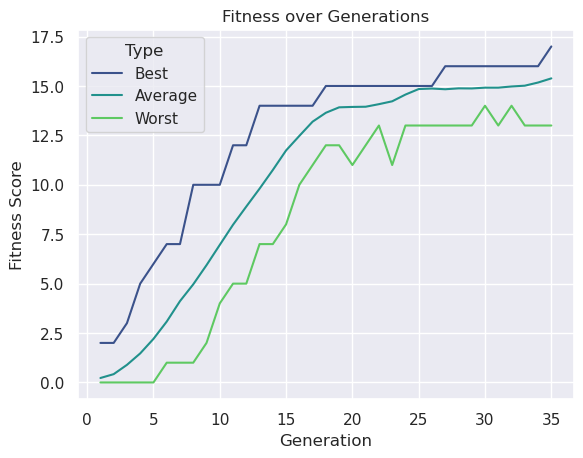

In [ ]:
def initialize_population():
    '''Creates the initial population of individuals.'''
    return [Individual() for _ in range(POPULATION)]


def plot_info(generations, best, avg, worst):
    '''Plots some information.'''
    import pandas as pd
    import seaborn as sns
    data = {
        "Generation": generations * 3,
        "Fitness": best + avg + worst,
        "Type": ["Best"]*len(best) + ["Average"]*len(avg) + ["Worst"]*len(worst)
    }
    df = pd.DataFrame(data)
    sns.set_theme(style="darkgrid")
    ax = sns.lineplot(data=df, x="Generation", y="Fitness", hue="Type", palette="viridis")
    ax.set(title="Fitness over Generations",
           xlabel="Generation",
           ylabel="Fitness Score"
    )

logs = []

def main():
    '''Main loop.'''
    gen = 1
    population = initialize_population()

    # Stats
    generations = []
    best_fitnesses = []
    avg_fitnesses = []
    worst_fitnesses = []


    while True:
        population.sort(key=lambda ind: ind.fitness, reverse=True)

        # Best individual
        best = population[0]

        # Some information for stats
        avg_fitness = sum(ind.fitness for ind in population) / POPULATION
        worst = population[-1]
        generations.append(gen)
        best_fitnesses.append(best.fitness)
        avg_fitnesses.append(avg_fitness)
        worst_fitnesses.append(worst.fitness)
        if gen <= 25 or gen % 10 == 0 or best.fitness == GNOME_LEN:
            logs.append((gen, ''.join(best.chromosome), best.fitness))

        # We found the target sequence
        if best.fitness == GNOME_LEN:
            break

        # Elitism: preserve best individual
        new_gen = [best]

        # Top 50% reproduce with crossover
        top_50 = population[:POPULATION // 2]

        # -1 because of best individual
        for _ in range(POPULATION - 1):
            parent_a = random.choice(top_50)
            parent_b = random.choice(top_50)
            child = parent_a.crossover(parent_b)
            new_gen.append(child)
        
        population = new_gen
        gen += 1

    print(f"Total number of generations: {gen}\n")
    plot_info(generations, best_fitnesses, avg_fitnesses, worst_fitnesses)

main()

As wee can see, in this run, it took only 35 generations to reach the goal. If you run this code again, the number of generations will be different.
In the graph we can observe the increase in the fitness score as the number of generations increases, and we see, for example, that between generation 18 and 34 there was no change, as the line remains horizontal.
Bellow we can see the chromosomal variation of the individual with the best fitness score.

In [4]:
print(f"{'Generation':<10} {'Sequence':<30} {'Fitness':<10}")
print("-"*50)
for gen, seq, fit in logs:
    print(f"{gen:<10} {seq:<30} {fit:<10}")

Generation Sequence                       Fitness   
--------------------------------------------------
1          J'u=Dk/2DL)Bgqzs«              2         
2          J'u=Dk/2DL)Bgqzs«              2         
3          V'N=DR _%Li5gMP}A              3         
4          27-tDR UBLinggP}s              5         
5          h[WtL& s,riGL] wv              6         
6           7Vt«a s.?ing;[MG              7         
7           7Vt«a s.?ing;[MG              7         
8          2uWt-a ssring] )4              10        
9          2uWt-a ssring] )4              10        
10         2uWt-a ssring] )4              10        
11         J0st4a striSg) :4              12        
12         J0st4a striSg) :4              12        
13         Just]a string« :O              14        
14         Just]a string« :O              14        
15         Just]a string« :O              14        
16         Just]a string« :O              14        
17         Just]a string« :O              14    